In [1]:
%config IPCompleter.greedy = True
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataFrame_7 = pd.read_csv("data/scaled7.csv")
df_7 = dataFrame_7

In [4]:
dataFrame_all = pd.read_csv("data/scaledAll.csv")
df_all = dataFrame_all

In [9]:
df_7.describe()

,retweet_count,is_quote_status,followers_count,friends_count,listed_count,favourites_count,statuses_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration,dow,is_weekend
count,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000
mean,0.003127,0.022378,0.084163,0.040210,0.296826,0.092152,0.554708,0.517776,0.094520,0.519766,0.021157,0.086234,0.715416,0.004112,0.842582,0.469390,0.225023
std,0.020208,0.147918,0.112388,0.090349,0.213872,0.141369,0.293479,0.299088,0.269884,0.190158,0.073689,0.128063,0.451242,0.018930,0.189323,0.320466,0.417621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000182,0.000000,0.014421,0.001370,0.133050,0.000743,0.350381,0.234940,0.000000,0.388889,0.000000,0.000000,0.000000,0.000000,0.666667,0.166667,0.000000
50%,0.000494,0.000000,0.028468,0.002878,0.253715,0.022658,0.551709,0.554217,0.000000,0.547619,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,0.000000
75%,0.001429,0.000000,0.068448,0.006629,0.382731,0.212911,0.827168,0.771084,0.200000,0.666667,0.000000,0.166667,1.000000,0.000000,1.000000,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_all.describe()

,retweet_count,is_quote_status,followers_count,friends_count,listed_count,favourites_count,statuses_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration,dow,is_weekend
count,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000,266115.000000
mean,0.000649,0.079406,0.165530,0.034637,0.096782,0.064425,0.110685,0.211577,0.143843,0.427138,0.043691,0.070171,0.455296,0.005224,0.648565,0.467481,0.226962
std,0.004416,0.270371,0.218310,0.137825,0.115009,0.141106,0.200507,0.202871,0.294669,0.192823,0.073019,0.091462,0.497998,0.015234,0.189547,0.320969,0.418869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000019,0.000000,0.025961,0.000348,0.041706,0.001290,0.014417,0.040509,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.666667,0.166667,0.000000
50%,0.000074,0.000000,0.069655,0.001103,0.066256,0.008553,0.028696,0.165799,0.000000,0.440559,0.000000,0.000000,0.000000,0.000000,0.666667,0.500000,0.000000
75%,0.000316,0.000000,0.222742,0.002748,0.106434,0.058566,0.091458,0.322338,0.300000,0.580420,0.100000,0.090909,1.000000,0.000000,0.666667,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24e3269400>,
      dtype=object)

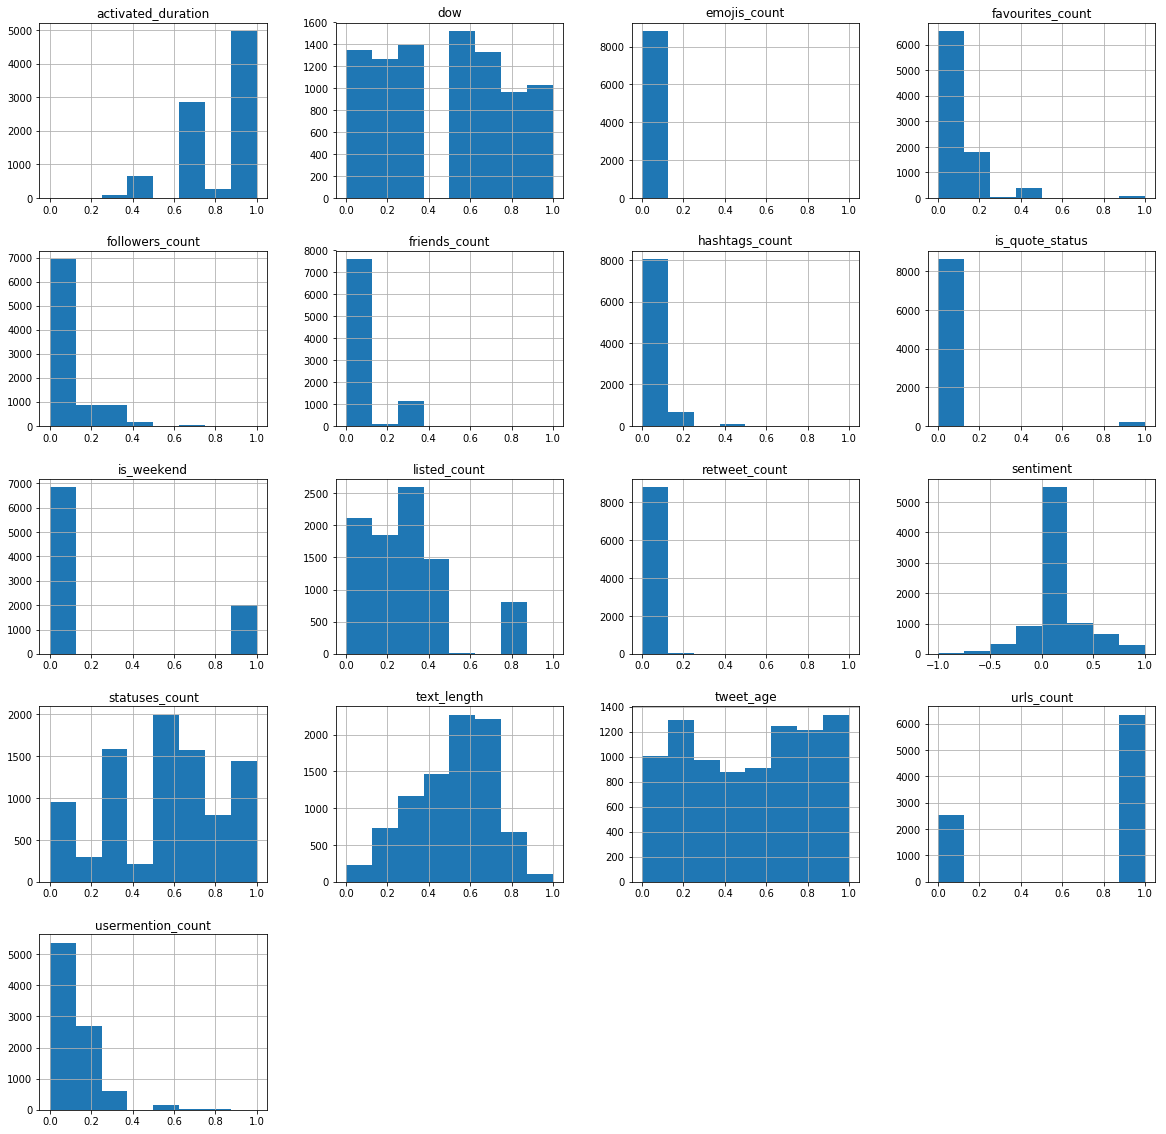

In [21]:
#use feature scalling and normalization for hevaly distrubuted features
#http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
df_7.hist(bins=8, figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24e0f0b278>,
      dtype=object)

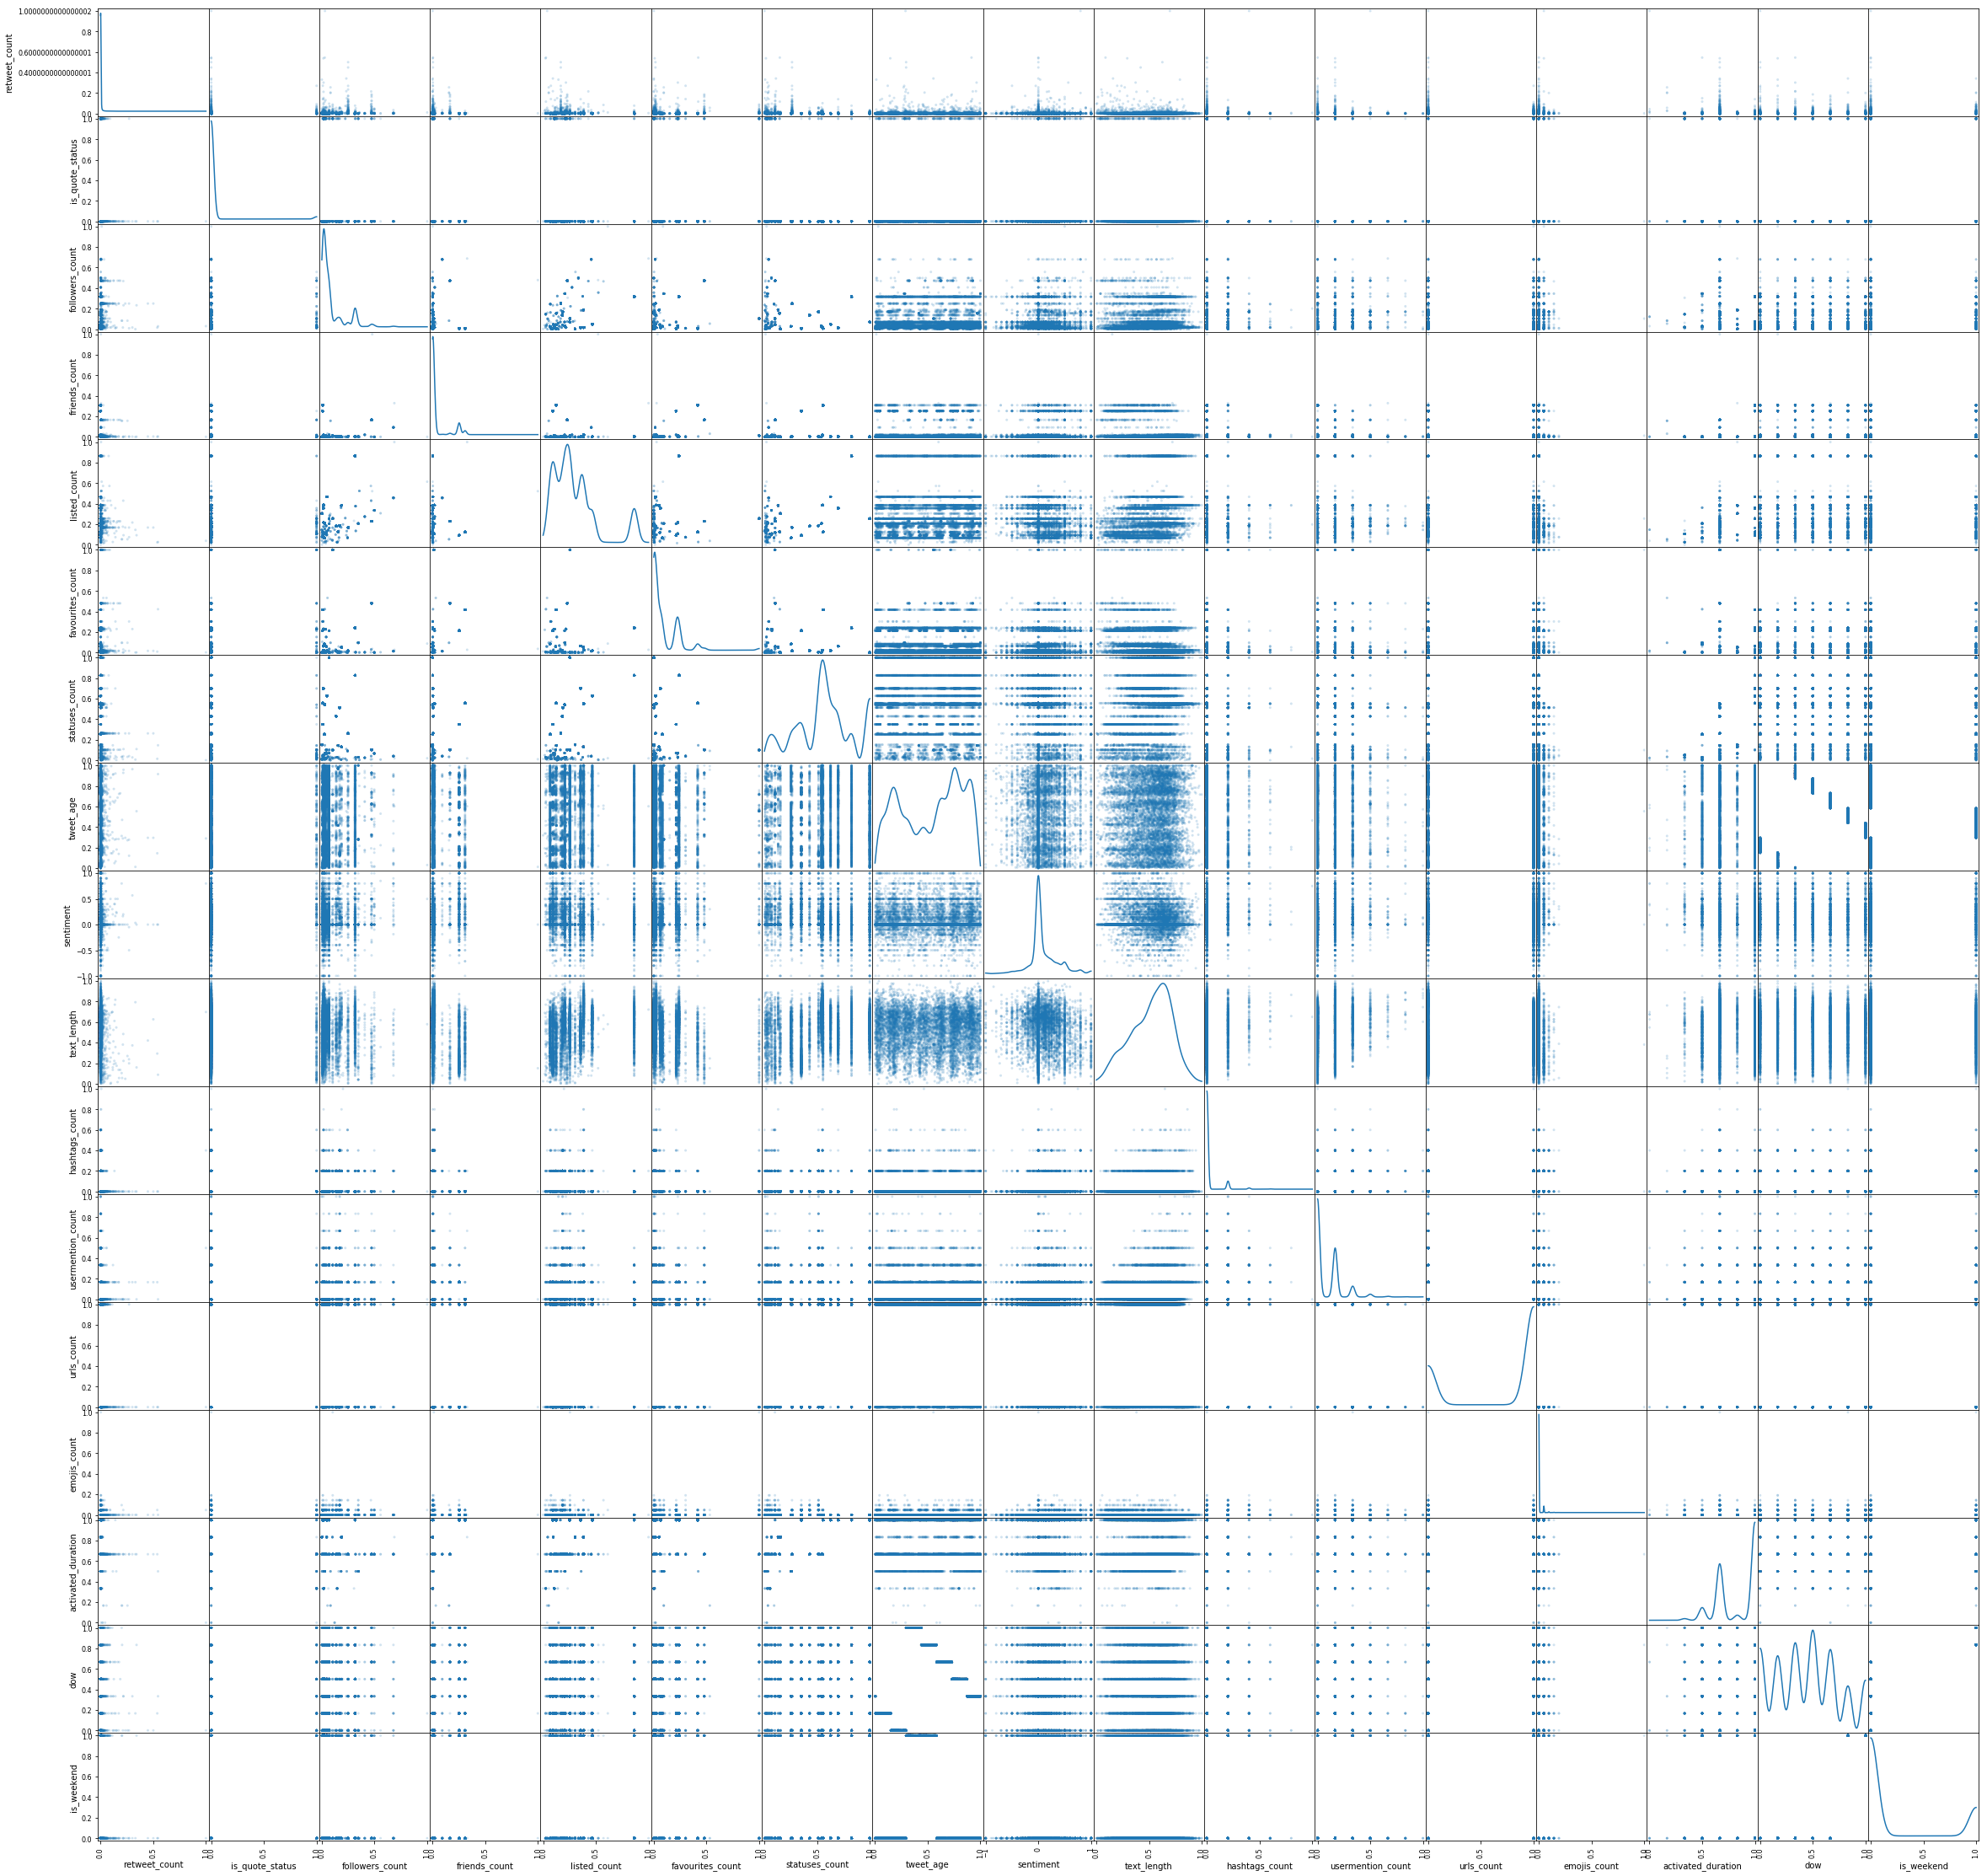

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_7, alpha=0.2, figsize=(40, 40), diagonal='kde')

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df_7['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()